In [1]:
import numpy as np

def relu(x):
    # Apply the ReLU activation function element-wise
    return np.maximum(0, x)

def heaviside(x):
    # Apply the Heaviside step function element-wise
    return (x > 0).astype(float)

def forward_pass(X, W1, W3):
    # Compute the input to the hidden layer
    X1 = np.dot(X, W1)
    
    # Apply ReLU activation to the hidden layer
    X2 = relu(X1)
    
    # Compute the output of the network
    X3 = np.dot(X2, W3)
    
    return X1, X2, X3

def backward_pass(X, y, W1, W3, X1, X2, X3):
    # Compute the error gradient at the output layer
    dE_dX3 = -(y - X3) 

    # Compute the gradient of the loss with respect to the output layer weights
    dE_dW3 = dE_dX3 @ X2

    # Propagate the error gradient back to the hidden layer
    dE_dX2 = W3 @ dE_dX3

    # Compute the error gradient at the input of the hidden layer
    dE_dX1 = heaviside(X2).T * dE_dX2
    
    # Compute the gradient of the loss with respect to the hidden layer weights
    dE_dW1 = dE_dX1 @ X 

    return dE_dW1, dE_dW3

# Example usage
X = np.array([[0.5, 0.8]])  # Input data
y = np.array([[1.0]])  # Ground truth labels

input_dim = X.shape[1]
hidden_dim = 2
output_dim = 1

# Initialize weights randomly
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Perform forward pass
X1, X2, X3 = forward_pass(X, W1, W2)

# Perform backward pass
dE_dW1, dE_dW3 = backward_pass(X, y, W1, W2, X1, X2, X3)

print(f"Gradient with respect to W1: \n {dE_dW1} \n")
print(f"Gradient with respect to W3: \n {dE_dW3}")

Gradient with respect to W1: 
 [[-0.10768404 -0.17229447]
 [ 0.          0.        ]] 

Gradient with respect to W3: 
 [[-0.6729851  0.       ]]


In [5]:
import numpy as np
import pandas as pd

def relu(x):
    # Apply the ReLU activation function element-wise
    return np.maximum(0, x)

def heaviside(x):
    # Apply the Heaviside step function element-wise
    return (x > 0).astype(float)

def forward_pass(X, W1, W2):
    # Compute the input to the hidden layer
    X1 = np.dot(X, W1)
    
    # Apply ReLU activation to the hidden layer
    X2 = relu(X1)
    
    # Compute the output of the network
    X3 = np.dot(X2, W2)
    
    return X1, X2, X3

def backward_pass(X, y, W1, W2, X1, X2, X3, learning_rate):
    # Compute the error gradient at the output layer
    dE_dX3 = -(y - X3) 

    # Compute the gradient of the loss with respect to the output layer weights
    dE_dW2 = np.dot(X2.T, dE_dX3)

    # Propagate the error gradient back to the hidden layer
    dE_dX2 = np.dot(dE_dX3, W2.T)

    # Compute the error gradient at the input of the hidden layer
    dE_dX1 = heaviside(X2) * dE_dX2
    
    # Compute the gradient of the loss with respect to the hidden layer weights
    dE_dW1 = np.dot(X.T, dE_dX1)

    # Update the weights using the gradients and learning rate
    W1 -= learning_rate * dE_dW1
    W2 -= learning_rate * dE_dW2

    return W1, W2

# Load the training data
training_data = pd.read_csv("water_waves_training_data.csv")

# Extract the input features and target variable
X = training_data[['height', 'wave_length']].values
y = training_data['speed'].values.reshape(-1, 1)

input_dim = X.shape[1]
hidden_dim = 32
output_dim = 1

# Initialize weights randomly
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Set the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 100

# Perform stochastic gradient descent
for epoch in range(num_epochs):
    for i in range(len(X)):
        # Get a single training sample
        X_sample = X[i].reshape(1, -1)
        y_sample = y[i].reshape(1, -1)
        
        # Perform forward pass
        X1, X2, X3 = forward_pass(X_sample, W1, W2)
        
        # Perform backward pass and update weights
        W1, W2 = backward_pass(X_sample, y_sample, W1, W2, X1, X2, X3, learning_rate)
    
    # Print the mean squared error every 10 epochs
    if (epoch + 1) % 10 == 0:
        y_pred = forward_pass(X, W1, W2)[-1]
        mse = np.mean((y - y_pred)**2)
        print(f"Epoch [{epoch+1}/{num_epochs}], Mean Squared Error: {mse:.4f}")

Epoch [10/100], Mean Squared Error: 39214.2029
Epoch [20/100], Mean Squared Error: 39214.2029
Epoch [30/100], Mean Squared Error: 39214.2029
Epoch [40/100], Mean Squared Error: 39214.2029
Epoch [50/100], Mean Squared Error: 39214.2029
Epoch [60/100], Mean Squared Error: 39214.2029
Epoch [70/100], Mean Squared Error: 39214.2029
Epoch [80/100], Mean Squared Error: 39214.2029
Epoch [90/100], Mean Squared Error: 39214.2029
Epoch [100/100], Mean Squared Error: 39214.2029


In [5]:
import numpy as np
import pandas as pd

# Load the training data
training_data = pd.read_csv("water_waves_training_data.csv")

# Extract the input features and target variable
X = training_data[['height', 'wave_length']].values
y = training_data['speed'].values.reshape(-1, 1)

# Split the data into training and testing sets (80/20 split)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize weights randomly
input_dim = X_train.shape[1]
hidden_dim = 2
output_dim = 1
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Set the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 100

# Perform stochastic gradient descent
for epoch in range(num_epochs):
    # Shuffle the training data
    indices = np.random.permutation(len(X_train))
    X_train = X_train[indices]
    y_train = y_train[indices]
    
    for i in range(len(X_train)):
        # Get a single training sample
        X_sample = X_train[i].reshape(1, -1)
        y_sample = y_train[i].reshape(1, -1)
        
        # Forward pass
        hidden_layer = np.maximum(0, np.dot(X_sample, W1))
        output = np.dot(hidden_layer, W2)
        
        # Backward pass
        output_delta = output - y_sample
        hidden_error = np.dot(output_delta, W2.T)
        hidden_delta = hidden_error * (hidden_layer > 0)
        
        # Update weights
        W2 -= learning_rate * np.dot(hidden_layer.T, output_delta)
        W1 -= learning_rate * np.dot(X_sample.T, hidden_delta)
    
    # Print the mean squared error every 10 epochs
    if (epoch + 1) % 10 == 0:
        hidden_layer = np.maximum(0, np.dot(X_test, W1))
        y_pred = np.dot(hidden_layer, W2)
        mse = np.mean((y_test - y_pred)**2)
        print(f"Epoch [{epoch+1}/{num_epochs}], Mean Squared Error: {mse:.10f}")

Epoch [10/100], Mean Squared Error: 39107.2715908021
Epoch [20/100], Mean Squared Error: 39107.2715908021
Epoch [30/100], Mean Squared Error: 39107.2715908021
Epoch [40/100], Mean Squared Error: 39107.2715908021
Epoch [50/100], Mean Squared Error: 39107.2715908021
Epoch [60/100], Mean Squared Error: 39107.2715908021
Epoch [70/100], Mean Squared Error: 39107.2715908021
Epoch [80/100], Mean Squared Error: 39107.2715908021
Epoch [90/100], Mean Squared Error: 39107.2715908021
Epoch [100/100], Mean Squared Error: 39107.2715908021


In [17]:
import numpy as np
import pandas as pd

# Load the training data
training_data = pd.read_csv("water_waves_training_data.csv")

# Extract the input features and target variable
X = training_data[['height', 'wave_length']].values
y = training_data['speed'].values.reshape(-1, 1)

# Split the data into training and testing sets (80/20 split)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize weights randomly
input_dim = X_train.shape[1]
hidden_dim = 2
output_dim = 1
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Set the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 100

# Perform stochastic gradient descent
for epoch in range(num_epochs):
    # Shuffle the training data
    indices = np.random.permutation(len(X_train))
    X_train = X_train[indices]
    y_train = y_train[indices]
    
    for i in range(len(X_train)):
        # Get a single training sample
        X_sample = X_train[i].reshape(1, -1)
        y_sample = y_train[i].reshape(1, -1)
        
        # Forward pass
        X1 = np.dot(X_sample, W1)
        X2 = np.maximum(0, X1)
        X3 = np.dot(X2, W2)
        
        # Backward pass
        dE_dX3 = X3 - y_sample
        dE_dW2 = np.dot(X2.T, dE_dX3)
        dE_dX2 = np.dot(dE_dX3, W2.T)
        dE_dX1 = dE_dX2 * (X1 > 0)
        dE_dW1 = np.dot(X_sample.T, dE_dX1)
        
        # Update weights
        W2 -= learning_rate * dE_dW2
        W1 -= learning_rate * dE_dW1
    
    # Print the mean squared error every 10 epochs
    if (epoch + 1) % 10 == 0:
        X1_test = np.dot(X_test, W1)
        X2_test = np.maximum(0, X1_test)
        y_pred = np.dot(X2_test, W2)
        mse = np.mean((y_test - y_pred)**2)
        print(f"Epoch [{epoch+1}/{num_epochs}], Mean Squared Error: {mse:.4f}")

Epoch [10/100], Mean Squared Error: 39107.2716
Epoch [20/100], Mean Squared Error: 39107.2716
Epoch [30/100], Mean Squared Error: 39107.2716
Epoch [40/100], Mean Squared Error: 39107.2716
Epoch [50/100], Mean Squared Error: 39107.2716
Epoch [60/100], Mean Squared Error: 39107.2716
Epoch [70/100], Mean Squared Error: 39107.2716
Epoch [80/100], Mean Squared Error: 39107.2716
Epoch [90/100], Mean Squared Error: 39107.2716
Epoch [100/100], Mean Squared Error: 39107.2716


In [12]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california = fetch_california_housing()

# Extract the input features (MedInc and AveRooms) and target variable (MedHouseVal)
X = california.data[:, [0, 5]]  # MedInc: Median income, AveRooms: Average number of rooms
y = california.target.reshape(-1, 1)

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights randomly
input_dim = X_train.shape[1]
hidden_dim = 2
output_dim = 1
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Set the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 1000

# Perform stochastic gradient descent
for epoch in range(num_epochs):
    # Shuffle the training data
    indices = np.random.permutation(len(X_train))
    X_train = X_train[indices]
    y_train = y_train[indices]
    
    for i in range(len(X_train)):
        # Get a single training sample
        X_sample = X_train[i].reshape(1, -1)
        y_sample = y_train[i].reshape(1, -1)
        
        # Forward pass
        X1 = np.dot(X_sample, W1)
        X2 = np.maximum(0, X1)
        X3 = np.dot(X2, W2)
        
        # Backward pass
        dE_dX3 = X3 - y_sample
        dE_dW2 = np.dot(X2.T, dE_dX3)
        dE_dX2 = np.dot(dE_dX3, W2.T)
        dE_dX1 = dE_dX2 * (X1 > 0)
        dE_dW1 = np.dot(X_sample.T, dE_dX1)
        
        # Update weights
        W2 -= learning_rate * dE_dW2
        W1 -= learning_rate * dE_dW1
    
    # Print the mean squared error every 10 epochs
    if (epoch + 1) % 10 == 0:
        X1_test = np.dot(X_test, W1)
        X2_test = np.maximum(0, X1_test)
        y_pred = np.dot(X2_test, W2)
        mse = np.mean((y_test - y_pred)**2)
        print(f"Epoch [{epoch+1}/{num_epochs}], Mean Squared Error: {mse:.4f}")

Epoch [10/1000], Mean Squared Error: 1.6388
Epoch [20/1000], Mean Squared Error: 1.6274
Epoch [30/1000], Mean Squared Error: 1.6287
Epoch [40/1000], Mean Squared Error: 1.6254
Epoch [50/1000], Mean Squared Error: 1.6211
Epoch [60/1000], Mean Squared Error: 1.6317
Epoch [70/1000], Mean Squared Error: 1.6960
Epoch [80/1000], Mean Squared Error: 1.6139
Epoch [90/1000], Mean Squared Error: 1.6487
Epoch [100/1000], Mean Squared Error: 1.7220
Epoch [110/1000], Mean Squared Error: 1.6473
Epoch [120/1000], Mean Squared Error: 1.6979
Epoch [130/1000], Mean Squared Error: 2.1043
Epoch [140/1000], Mean Squared Error: 1.6533
Epoch [150/1000], Mean Squared Error: 1.6142
Epoch [160/1000], Mean Squared Error: 1.6547
Epoch [170/1000], Mean Squared Error: 1.6145
Epoch [180/1000], Mean Squared Error: 1.6609
Epoch [190/1000], Mean Squared Error: 1.7375
Epoch [200/1000], Mean Squared Error: 1.6375
Epoch [210/1000], Mean Squared Error: 1.6270
Epoch [220/1000], Mean Squared Error: 1.6490
Epoch [230/1000], M

In [15]:
import numpy as np
import pandas as pd

# Load and prepare data
training_data = pd.read_csv("water_waves_training_data.csv")
g = 9.80665  # Gravitational acceleration

# Compute dimensionally homogeneous and normalized inputs/output
c4 = training_data['speed']**4
training_data['g2h2_c4'] = (g**2 * training_data['height']**2) / c4
training_data['g2hl_c4'] = (g**2 * training_data['height'] * training_data['wave_length']) / c4
X = training_data[["g2h2_c4", "g2hl_c4"]].values
y = (c4 / c4).values.reshape(-1, 1)  # Normalized target (always 1)

X = training_data[['height', 'wave_length']]
y = training_data.speed.values.reshape(-1, 1) 

# Split data (80/20)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Network parameters
input_dim, hidden_dim, output_dim = 2, 2, 1

# Initialize weights
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Learning rate and epochs
learning_rate = 0.01
num_epochs = 1000

# Stochastic Gradient Descent
for epoch in range(num_epochs):
    # Shuffle training data
    indices = np.random.permutation(len(X_train))
    X_train = X_train[indices]
    y_train = y_train[indices]

    for i in range(len(X_train)):
        # Get a single training sample
        X_sample = X_train[i].reshape(1, -1)
        y_sample = y_train[i].reshape(1, -1)

        # Forward pass
        X1 = np.dot(X_sample, W1)
        X2 = np.maximum(0, X1)  # ReLU activation
        X3 = np.dot(X2, W2)

        # Backward pass
        dE_dX3 = X3 - y_sample
        dE_dW2 = np.dot(X2.T, dE_dX3)
        dE_dX2 = np.dot(dE_dX3, W2.T)
        dE_dX1 = dE_dX2 * (X1 > 0)
        dE_dW1 = np.dot(X_sample.T, dE_dX1)

        # Update weights
        W2 -= learning_rate * dE_dW2
        W1 -= learning_rate * dE_dW1

    # Calculate and print MSE for both training and testing sets
    if (epoch + 1) % 10 == 0:
        # Training MSE
        X1_train = np.dot(X_train, W1)
        X2_train = np.maximum(0, X1_train)
        y_pred_train = np.dot(X2_train, W2)
        mse_train = np.mean((y_train - y_pred_train)**2)

        # Testing MSE
        X1_test = np.dot(X_test, W1)
        X2_test = np.maximum(0, X1_test)
        y_pred_test = np.dot(X2_test, W2)
        mse_test = np.mean((y_test - y_pred_test)**2)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

KeyError: "None of [Index([305, 760, 110, 706, 278,  57, 487, 782, 289, 156,\n       ...\n       405, 203, 609, 746, 453, 311, 749, 565, 206, 301],\n      dtype='int64', length=800)] are in the [columns]"

In [7]:
import numpy as np
import pandas as pd

def relu(x):
    # Apply the ReLU activation function element-wise
    return np.maximum(0, x)

def heaviside(x):
    # Apply the Heaviside step function element-wise
    return (x > 0).astype(float)

def forward_pass(X, W1, W2):
    # Compute the input to the hidden layer
    X1 = np.dot(X, W1)
    
    # Apply ReLU activation to the hidden layer
    X2 = relu(X1)
    
    # Compute the output of the network
    X3 = np.dot(X2, W2)
    
    return X1, X2, X3

def backward_pass(X, y, W1, W2, X1, X2, X3, learning_rate):
    # Compute the error gradient at the output layer
    dE_dX3 = -(y - X3) 

    # Compute the gradient of the loss with respect to the output layer weights
    dE_dW2 = np.dot(X2.T, dE_dX3)

    # Propagate the error gradient back to the hidden layer
    dE_dX2 = np.dot(dE_dX3, W2.T)

    # Compute the error gradient at the input of the hidden layer
    dE_dX1 = heaviside(X2) * dE_dX2
    
    # Compute the gradient of the loss with respect to the hidden layer weights
    dE_dW1 = np.dot(X.T, dE_dX1)

    # Update the weights using the gradients and learning rate
    W1 -= learning_rate * dE_dW1
    W2 -= learning_rate * dE_dW2

    return W1, W2

# Load the training data
training_data = pd.read_csv("water_waves_training_data.csv")

# Define gravitational acceleration
g = 9.80665

# Compute new variables based on the given formulas
g2h2 = g**2 * training_data['height']**2
g2hl = g**2 * training_data['height'] * training_data['wave_length']
c4 = training_data['speed']**4

# Create a new DataFrame with the dimensionally homogeneous inputs and output
data = pd.DataFrame({'g2h2': g2h2, 'g2hl': g2hl, 'c4': c4})

# Split the data into training and testing sets (80/20 split)
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Extract the input features and target variable for training
X_train = train_data[['g2h2', 'g2hl']].values
y_train = train_data['c4'].values.reshape(-1, 1)

# Extract the input features and target variable for testing
X_test = test_data[['g2h2', 'g2hl']].values
y_test = test_data['c4'].values.reshape(-1, 1)

input_dim = X_train.shape[1]
hidden_dim = 32
output_dim = 1

# Initialize weights randomly
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Set the learning rate and number of epochs
learning_rate = 0.001
num_epochs = 100

# Perform stochastic gradient descent
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        # Get a single training sample
        X_sample = X_train[i].reshape(1, -1)
        y_sample = y_train[i].reshape(1, -1)
        
        # Perform forward pass
        X1, X2, X3 = forward_pass(X_sample, W1, W2)
        
        # Perform backward pass and update weights
        W1, W2 = backward_pass(X_sample, y_sample, W1, W2, X1, X2, X3, learning_rate)
    
    # Print the mean squared error for training data every 10 epochs
    if (epoch + 1) % 10 == 0:
        y_pred_train = forward_pass(X_train, W1, W2)[-1]
        mse_train = np.mean((y_train - y_pred_train)**2)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train MSE: {mse_train:.4f}")

# Evaluate the model on the testing set
y_pred_test = forward_pass(X_test, W1, W2)[-1]
mse_test = np.mean((y_test - y_pred_test)**2)
print(f"Test Mean Squared Error: {mse_test:.4f}")

Epoch [10/100], Train MSE: 36034543881493823488.0000
Epoch [20/100], Train MSE: 36034543881493823488.0000
Epoch [30/100], Train MSE: 36034543881493823488.0000
Epoch [40/100], Train MSE: 36034543881493823488.0000
Epoch [50/100], Train MSE: 36034543881493823488.0000
Epoch [60/100], Train MSE: 36034543881493823488.0000
Epoch [70/100], Train MSE: 36034543881493823488.0000
Epoch [80/100], Train MSE: 36034543881493823488.0000
Epoch [90/100], Train MSE: 36034543881493823488.0000
Epoch [100/100], Train MSE: 36034543881493823488.0000
Test Mean Squared Error: 36620836487887699968.0000


# Working but not according to addendum

Epoch [1000/10000], Loss: 39214.2029
Epoch [2000/10000], Loss: 39214.2029
Epoch [3000/10000], Loss: 39214.2029
Epoch [4000/10000], Loss: 39214.2029
Epoch [5000/10000], Loss: 39214.2029
Epoch [6000/10000], Loss: 39214.2029
Epoch [7000/10000], Loss: 39214.2029
Epoch [8000/10000], Loss: 39214.2029
Epoch [9000/10000], Loss: 39214.2029
Epoch [10000/10000], Loss: 39214.2029


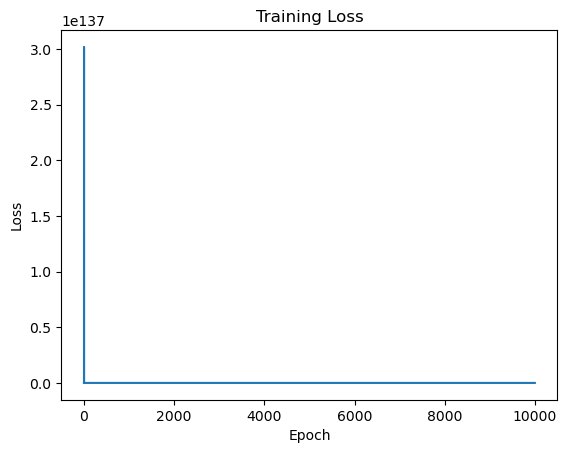

In [102]:
import numpy as np
import matplotlib.pyplot as plt

class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        return self.z2

    def backward(self, X, y, learning_rate):
        dLoss_dZ2 = self.z2 - y
        dLoss_dW2 = np.dot(self.a1.T, dLoss_dZ2)
        dLoss_dA1 = np.dot(dLoss_dZ2, self.W2.T)
        dLoss_dZ1 = dLoss_dA1 * (self.a1 > 0)
        dLoss_dW1 = np.dot(X.T, dLoss_dZ1)

        self.W2 -= learning_rate * dLoss_dW2 
        self.W1 -= learning_rate * dLoss_dW1

    def train(self, X, y, num_epochs, learning_rate):
        loss_history = []

        for epoch in range(num_epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if (epoch + 1) % 1000 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}")

        return loss_history

# Load the data from the CSV file
data = pd.read_csv("water_waves_training_data.csv")

# Extract input features (height and wave_length) and target variable (speed)
X = data[['height', 'wave_length']].values
y = data['speed'].values.reshape(-1, 1)

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

input_size = 2
hidden_size = 4
output_size = 1
num_epochs = 10000
learning_rate = 0.001

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
loss_history = network.train(X, y, num_epochs, learning_rate)

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### $c^4 = S(g^2h^2, g^2h\lambda)$ ---------- $(m^4/s^4)$

Epoch [1000/100000], Train Loss: 443.7136119706, Val Loss: 130656.9649563681
Epoch [2000/100000], Train Loss: 16.2732804542, Val Loss: 70048.5018583734
Epoch [3000/100000], Train Loss: 30.7279853725, Val Loss: 42683.1417614233
Epoch [4000/100000], Train Loss: 376459.0781334605, Val Loss: 28090.7566997325
Epoch [5000/100000], Train Loss: 4.7523854469, Val Loss: 19441.9425591678
Epoch [6000/100000], Train Loss: 361.4101693894, Val Loss: 13931.3477185638
Epoch [7000/100000], Train Loss: 26749.2365601626, Val Loss: 10233.4798093357
Epoch [8000/100000], Train Loss: 1.4825908864, Val Loss: 7655.1876352495
Epoch [9000/100000], Train Loss: 3939.5105419735, Val Loss: 5804.8577610591
Epoch [10000/100000], Train Loss: 307.9064359092, Val Loss: 4447.3199790761
Epoch [11000/100000], Train Loss: 0.9931816849, Val Loss: 3434.2085420802
Epoch [12000/100000], Train Loss: 0.7855014320, Val Loss: 2668.0487429188
Epoch [13000/100000], Train Loss: 2337.1544597176, Val Loss: 2082.6108467869
Epoch [14000/100

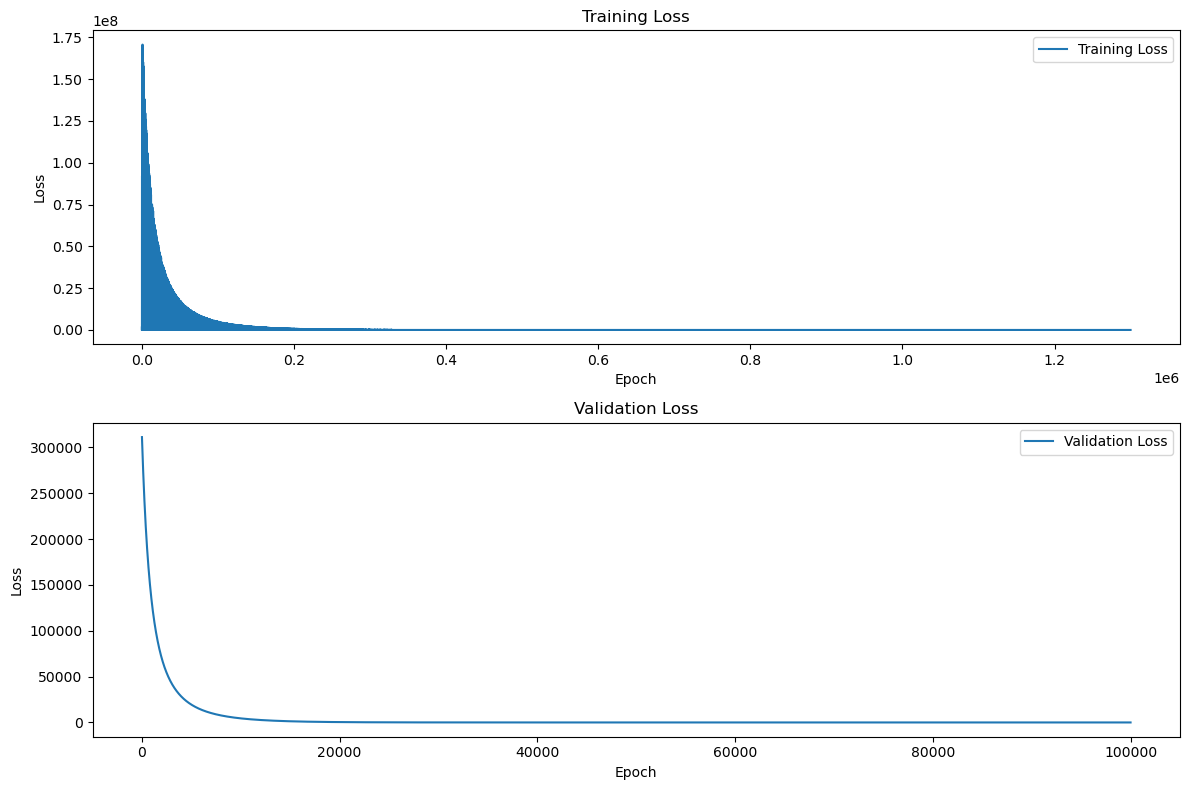

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = {
            'W1': np.random.uniform(-1, 1, size=(input_size, hidden_size)),
            'W2': np.random.uniform(-1, 1, size=(hidden_size, output_size))
        }

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights['W1'])
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights['W2'])
        return self.z2

    def backward(self, X, y, learning_rate):
        dLoss_dZ2 = np.dot(2, self.z2) - y
        dLoss_dW2 = np.dot(self.a1.T, dLoss_dZ2)
        dLoss_dA1 = np.dot(dLoss_dZ2, self.weights['W2'].T)
        dLoss_dZ1 = dLoss_dA1 * (self.a1 > 0)
        dLoss_dW1 = np.dot(X.T, dLoss_dZ1)

        self.weights['W2'] -= learning_rate * dLoss_dW2 
        self.weights['W1'] -= learning_rate * dLoss_dW1

    def train(self, X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size):
        train_loss_history = []
        val_loss_history = []

        for epoch in range(num_epochs):
            # Shuffle the training data indices
            indices = np.random.permutation(len(X_train))

            # Perform mini-batch gradient descent
            for i in range(0, len(X_train), batch_size):
                # Get the batch indices
                batch_indices = indices[i:i+batch_size]
                
                # Select the batch data using the shuffled indices
                batch_X = X_train[batch_indices]
                batch_y = y_train[batch_indices]

                # Forward pass and loss calculation for the batch
                batch_output = self.forward(batch_X)
                batch_loss = np.mean(((batch_output - batch_y)/batch_y) ** 2)
                train_loss_history.append(batch_loss)

                #print(f'np.max(train_loss_history) = {np.max(train_loss_history)}')

                self.backward(batch_X, batch_y, learning_rate)

            # Forward pass and loss calculation for validation data
            val_output = self.forward(X_val)
            val_loss = np.mean((val_output - y_val) ** 2)
            val_loss_history.append(val_loss)

            if (epoch + 1) % 1000 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {batch_loss:.10f}, Val Loss: {val_loss:.10f}")

        return train_loss_history, val_loss_history

# Load the data from the CSV file
data = pd.read_csv("water_waves_training_data.csv")

# Load and prepare data
training_data = pd.read_csv("water_waves_training_data.csv")
g = 9.80665  # Gravitational acceleration

# Compute dimensionally homogeneous and normalized inputs/output
c4 = training_data['speed']**4
training_data['g2h2_c4'] = (g**2 * training_data['height']**2) / c4
training_data['g2hl_c4'] = (g**2 * training_data['height'] * training_data['wave_length']) / c4
X = training_data[["g2h2_c4", "g2hl_c4"]].values
y = (c4 / c4).values.reshape(-1, 1)  # Normalized target (always 1)

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


input_size = 2
hidden_size = 2
output_size = 1
num_epochs = 100000
learning_rate = 0.00000000000001
#learning_rate = 0.000000000000000001
#learning_rate = 10e-6
batch_size = 64

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
train_loss_history, val_loss_history = network.train(X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size)

# Plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 45384.8641


### $c^2=S(gh, g \sqrt{h\lambda})$ ---------- $(m^2/s^2)$

Epoch [1000/100000], Train Loss: 1.2853660380, Val Loss: 2.8412032957
Epoch [2000/100000], Train Loss: 1.1457251080, Val Loss: 2.5147918769
Epoch [3000/100000], Train Loss: 1.1516185122, Val Loss: 2.2691095579
Epoch [4000/100000], Train Loss: 1.1802812429, Val Loss: 2.0795121430
Epoch [5000/100000], Train Loss: 1.1460239787, Val Loss: 1.9297251073
Epoch [6000/100000], Train Loss: 7.8865224527, Val Loss: 1.8093222843
Epoch [7000/100000], Train Loss: 1.0311507754, Val Loss: 1.7112009208
Epoch [8000/100000], Train Loss: 1.2406377710, Val Loss: 1.6299019296
Epoch [9000/100000], Train Loss: 1.0205942237, Val Loss: 1.5616508282
Epoch [10000/100000], Train Loss: 1.0589950719, Val Loss: 1.5038043124
Epoch [11000/100000], Train Loss: 1.1175093274, Val Loss: 1.4543226820
Epoch [12000/100000], Train Loss: 1.0101049121, Val Loss: 1.4116862564
Epoch [13000/100000], Train Loss: 1.1519176654, Val Loss: 1.3745497112
Epoch [14000/100000], Train Loss: 1.0671953740, Val Loss: 1.3419938176
Epoch [15000/10

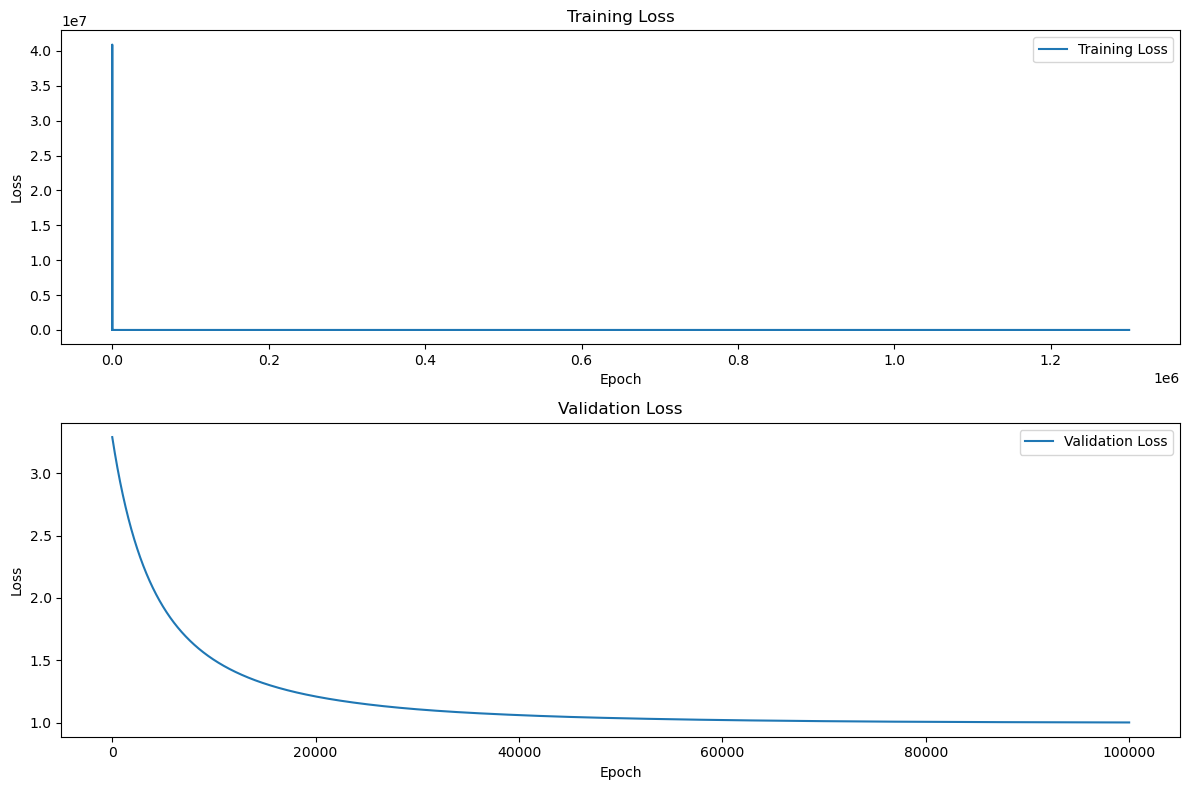

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = {
            'W1': np.random.uniform(-1, 1, size=(input_size, hidden_size)),
            'W2': np.random.uniform(-1, 1, size=(hidden_size, output_size))
        }

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights['W1'])
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights['W2'])
        return self.z2

    def backward(self, X, y, learning_rate):
        dLoss_dZ2 = np.dot(2, self.z2) - y
        dLoss_dW2 = np.dot(self.a1.T, dLoss_dZ2)
        dLoss_dA1 = np.dot(dLoss_dZ2, self.weights['W2'].T)
        dLoss_dZ1 = dLoss_dA1 * (self.a1 > 0)
        dLoss_dW1 = np.dot(X.T, dLoss_dZ1)

        self.weights['W2'] -= learning_rate * dLoss_dW2 
        self.weights['W1'] -= learning_rate * dLoss_dW1

    def train(self, X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size):
        train_loss_history = []
        val_loss_history = []

        for epoch in range(num_epochs):
            # Shuffle the training data indices
            indices = np.random.permutation(len(X_train))

            # Perform mini-batch gradient descent
            for i in range(0, len(X_train), batch_size):
                # Get the batch indices
                batch_indices = indices[i:i+batch_size]
                
                # Select the batch data using the shuffled indices
                batch_X = X_train[batch_indices]
                batch_y = y_train[batch_indices]

                # Forward pass and loss calculation for the batch
                batch_output = self.forward(batch_X)
                batch_loss = np.mean(((batch_output - batch_y)/batch_y) ** 2)
                train_loss_history.append(batch_loss)

                #print(f'np.max(train_loss_history) = {np.max(train_loss_history)}')

                self.backward(batch_X, batch_y, learning_rate)

            # Forward pass and loss calculation for validation data
            val_output = self.forward(X_val)
            val_loss = np.mean((val_output - y_val) ** 2)
            val_loss_history.append(val_loss)

            if (epoch + 1) % 1000 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {batch_loss:.10f}, Val Loss: {val_loss:.10f}")

        return train_loss_history, val_loss_history

# Load the data from the CSV file
data = pd.read_csv("water_waves_training_data.csv")

# Load and prepare data
training_data = pd.read_csv("water_waves_training_data.csv")
g = 9.80665  # Gravitational acceleration

# Compute dimensionally homogeneous and normalized inputs/output
c2 = data['speed']**2
data['gh_c2'] = (g * data['height']) / c2
data['gsl_c2'] = (g * np.sqrt(data['height'] * data['wave_length'])) / c2
X = data[["gh_c2", "gsl_c2"]].values
y = (c2 / c2).values.reshape(-1, 1)  # Normalized target (always 1)

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


input_size = 2
hidden_size = 2
output_size = 1
num_epochs = 100000
learning_rate = 0.000000001
#learning_rate = 0.000000000000000001
#learning_rate = 10e-6
batch_size = 64

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
train_loss_history, val_loss_history = network.train(X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size)

# Plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 45384.8641


### $c^2 = S(g\sqrt{h^2+\lambda^2}, \frac{gh\lambda}{h+\lambda})$ ------------ $(m^2/s^2)$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = {
            'W1': np.random.uniform(-1, 1, size=(input_size, hidden_size)),
            'W2': np.random.uniform(-1, 1, size=(hidden_size, output_size))
        }

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights['W1'])
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights['W2'])
        return self.z2

    def backward(self, X, y, learning_rate):
        dLoss_dZ2 = np.dot(2, self.z2) - y
        dLoss_dW2 = np.dot(self.a1.T, dLoss_dZ2)
        dLoss_dA1 = np.dot(dLoss_dZ2, self.weights['W2'].T)
        dLoss_dZ1 = dLoss_dA1 * (self.a1 > 0)
        dLoss_dW1 = np.dot(X.T, dLoss_dZ1)

        self.weights['W2'] -= learning_rate * dLoss_dW2 
        self.weights['W1'] -= learning_rate * dLoss_dW1

    def train(self, X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size):
        train_loss_history = []
        val_loss_history = []

        for epoch in range(num_epochs):
            # Shuffle the training data indices
            indices = np.random.permutation(len(X_train))

            # Perform mini-batch gradient descent
            for i in range(0, len(X_train), batch_size):
                # Get the batch indices
                batch_indices = indices[i:i+batch_size]
                
                # Select the batch data using the shuffled indices
                batch_X = X_train[batch_indices]
                batch_y = y_train[batch_indices]

                # Forward pass and loss calculation for the batch
                batch_output = self.forward(batch_X)
                batch_loss = np.mean(((batch_output - batch_y)/batch_y) ** 2)
                train_loss_history.append(batch_loss)

                #print(f'np.max(train_loss_history) = {np.max(train_loss_history)}')

                self.backward(batch_X, batch_y, learning_rate)

            # Forward pass and loss calculation for validation data
            val_output = self.forward(X_val)
            val_loss = np.mean((val_output - y_val) ** 2)
            val_loss_history.append(val_loss)

            if (epoch + 1) % 1000 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {batch_loss:.10f}, Val Loss: {val_loss:.10f}")

        return train_loss_history, val_loss_history

# Load the data from the CSV file
data = pd.read_csv("water_waves_training_data.csv")

# Load and prepare data
training_data = pd.read_csv("water_waves_training_data.csv")
g = 9.80665  # Gravitational acceleration

# Compute dimensionally homogeneous and normalized inputs/output
c2 = data['speed']**2
data['ghl_c2'] = (g * np.sqrt(data['height']**2 + data['wave_length']**2)) / c2
data['gl_c2'] = (g * data['height'] * data['wave_length']) / (data['height'] + data['wave_length']) / c2
X = data[["ghl_c2", "gl_c2"]].values
y = (c2 / c2).values.reshape(-1, 1)  # Normalized target (always 1)

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


input_size = 2
hidden_size = 2
output_size = 1
num_epochs = 100000
learning_rate = 0.000000001
#learning_rate = 0.000000000000000001
#learning_rate = 10e-6
batch_size = 64

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
train_loss_history, val_loss_history = network.train(X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size)

# Plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 45384.8641


### $c = S(h,\lambda)$

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = {
            'W1': np.random.uniform(-1, 1, size=(input_size, hidden_size)),
            'W2': np.random.uniform(-1, 1, size=(hidden_size, output_size))
        }

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights['W1'])
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights['W2'])
        return self.z2

    def backward(self, X, y, learning_rate):
        dLoss_dZ2 = np.dot(2, self.z2) - y
        dLoss_dW2 = np.dot(self.a1.T, dLoss_dZ2)
        dLoss_dA1 = np.dot(dLoss_dZ2, self.weights['W2'].T)
        dLoss_dZ1 = dLoss_dA1 * (self.a1 > 0)
        dLoss_dW1 = np.dot(X.T, dLoss_dZ1)

        self.weights['W2'] -= learning_rate * dLoss_dW2 
        self.weights['W1'] -= learning_rate * dLoss_dW1

    def train(self, X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size):
        train_loss_history = []
        val_loss_history = []

        for epoch in range(num_epochs):
            # Shuffle the training data indices
            indices = np.random.permutation(len(X_train))

            # Perform mini-batch gradient descent
            for i in range(0, len(X_train), batch_size):
                # Get the batch indices
                batch_indices = indices[i:i+batch_size]
                
                # Select the batch data using the shuffled indices
                batch_X = X_train[batch_indices]
                batch_y = y_train[batch_indices]

                # Forward pass and loss calculation for the batch
                batch_output = self.forward(batch_X)
                batch_loss = np.mean(((batch_output - batch_y)/batch_y) ** 2)
                train_loss_history.append(batch_loss)

                #print(f'np.max(train_loss_history) = {np.max(train_loss_history)}')

                self.backward(batch_X, batch_y, learning_rate)

            # Forward pass and loss calculation for validation data
            val_output = self.forward(X_val)
            val_loss = np.mean((val_output - y_val) ** 2)
            val_loss_history.append(val_loss)

            if (epoch + 1) % 1000 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {batch_loss:.10f}, Val Loss: {val_loss:.10f}")

        return train_loss_history, val_loss_history

# Load the data from the CSV file
data = pd.read_csv("water_waves_training_data.csv")

# Load and prepare data
training_data = pd.read_csv("water_waves_training_data.csv")
X = training_data[['height', 'wave_length']].values
y = training_data.speed.values.reshape(-1, 1) 
# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


input_size = 2
hidden_size = 2
output_size = 1
num_epochs = 100000
learning_rate = 0.000000000001
#learning_rate = 0.000000000000000001
#learning_rate = 10e-6
batch_size = 64

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
train_loss_history, val_loss_history = network.train(X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size)

# Plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 45384.8641


Epoch [1000/100000], Train Loss: 1.0901268834, Val Loss: 13282.3293730470
Epoch [2000/100000], Train Loss: 0.3471583314, Val Loss: 13097.1631433990
Epoch [3000/100000], Train Loss: 3.3705289960, Val Loss: 13352.9754918254
Epoch [4000/100000], Train Loss: 0.5817707377, Val Loss: 12628.8041636351
Epoch [5000/100000], Train Loss: 0.6193980832, Val Loss: 12601.4080542933
Epoch [6000/100000], Train Loss: 0.7530043586, Val Loss: 12883.7429931433
Epoch [7000/100000], Train Loss: 61.5902110831, Val Loss: 12427.1400728917
Epoch [8000/100000], Train Loss: 0.5186940513, Val Loss: 13165.0977126552
Epoch [9000/100000], Train Loss: 0.4866271899, Val Loss: 13334.8215641264
Epoch [10000/100000], Train Loss: 0.4613036650, Val Loss: 12814.5369528341
Epoch [11000/100000], Train Loss: 0.3631563387, Val Loss: 12740.3504739282
Epoch [12000/100000], Train Loss: 0.4442441082, Val Loss: 12834.8378777002
Epoch [13000/100000], Train Loss: 3.5333133168, Val Loss: 13688.9614839963
Epoch [14000/100000], Train Loss:

KeyboardInterrupt: 

In [86]:
# Load and prepare data
training_data = pd.read_csv("water_waves_training_data.csv")
training_data

,height,wave_length,speed
0,78599.688827,1927.337789,54.855918
1,3508.728292,15221.672338,145.873054
2,86448.282139,16151.549318,158.800426
3,91334.040209,47468.784789,272.237925
4,77957.635081,29367.526137,214.130362
...,...,...,...
995,48084.321176,2020.466097,56.165594
996,3678.472520,76407.374015,187.147094
997,54015.980010,58781.496225,302.942840
998,81416.981745,77626.967267,348.136901


In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = {
            'W1': np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size),
            'W2': np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
        }

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        z1 = np.dot(X, self.weights['W1'])
        a1 = self.relu(z1)
        z2 = np.dot(a1, self.weights['W2'])
        return z2

    def backward(self, X, y, learning_rate):
        z2, a1, z1 = self.forward(X)
        dLoss_dZ2 = 2 * (z2 - y) / y
        dLoss_dW2 = np.dot(a1.T, dLoss_dZ2)
        dLoss_dA1 = np.dot(dLoss_dZ2, self.weights['W2'].T)
        dLoss_dZ1 = dLoss_dA1 * (a1 > 0)
        dLoss_dW1 = np.dot(X.T, dLoss_dZ1)
        self.weights['W2'] -= learning_rate * dLoss_dW2
        self.weights['W1'] -= learning_rate * dLoss_dW1

    def train(self, X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size):
        train_loss_history = []
        val_loss_history = []

        for epoch in range(num_epochs):
            # Shuffle the training data indices
            indices = np.random.permutation(len(X_train))

            # Perform mini-batch gradient descent
            for i in range(0, len(X_train), batch_size):
                batch_indices = indices[i:i+batch_size]
                batch_X, batch_y = X_train[batch_indices], y_train[batch_indices]
                self.backward(batch_X, batch_y, learning_rate)

            # Calculate loss for training and validation data
            train_loss = self.calculate_loss(X_train, y_train)
            val_loss = self.calculate_loss(X_val, y_val)
            train_loss_history.append(train_loss)
            val_loss_history.append(val_loss)

            if (epoch + 1) % 1000 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        return train_loss_history, val_loss_history

    def calculate_loss(self, X, y):
        output = self.forward(X)
        loss = np.mean(((output - y) / y) ** 2)
        return loss
    

# Load the data from the CSV file
data = pd.read_csv("water_waves_training_data.csv")

# Extract input features (height and wave_length) and target variable (speed)
X = data[['height', 'wave_length']].values
y = data['speed'].values.reshape(-1, 1)

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


input_size = 2
hidden_size = 128
output_size = 1
num_epochs = 100000
learning_rate = 0.0000000000000000001
#learning_rate = 0.000000000001
#learning_rate = 10e-6
batch_size = 32

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
train_loss_history, val_loss_history = network.train(X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size)

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Set y-axis limits
#plt.ylim(0, max(max(train_loss_history), max(val_loss_history)) * 1.1)  # 10% buffer

# Plot the training and validation accuracy
train_accuracy = np.mean((network.forward(X_train) > 0.5) == y_train)
val_accuracy = np.mean((network.forward(X_val) > 0.5) == y_val)
plt.subplot(1, 2, 2)
plt.bar(['Training', 'Validation'], [train_accuracy, val_accuracy])
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# Evaluate the network on the validation set
val_output = network.forward(X_val)
print(f'p.mean(val_output-y_val) = {np.mean(val_output-y_val)}')
print(f'np.mean(val_output) = {np.mean(val_output)}')
print(f'np.mean(y_val) = {np.mean(y_val)}')

ValueError: too many values to unpack (expected 3)

# According to addendum but not working

In [77]:
import numpy as np
import matplotlib.pyplot as plt

class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize weights randomly with Xavier initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        return self.z2

    def backward(self, X, y, learning_rate):
        dLoss_dZ2 = self.z2 - y
        dLoss_dW2 = np.dot(dLoss_dZ2, self.a1)
        dLoss_dA1 = np.dot(self.W2, dLoss_dZ2)
        dLoss_dZ1 = (self.a1 > 0).T * dLoss_dA1
        dLoss_dW1 = np.dot(dLoss_dZ1, X)

        self.W2 -= learning_rate * dLoss_dW2 
        self.W1 -= learning_rate * dLoss_dW1

    def train(self, X, y, num_epochs, learning_rate):
        loss_history = []

        for epoch in range(num_epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}")

        return loss_history

# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 4
output_size = 1
num_epochs = 1000
learning_rate = 0.1

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
loss_history = network.train(X, y, num_epochs, learning_rate)

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

ValueError: shapes (4,1) and (4,4) not aligned: 1 (dim 1) != 4 (dim 0)